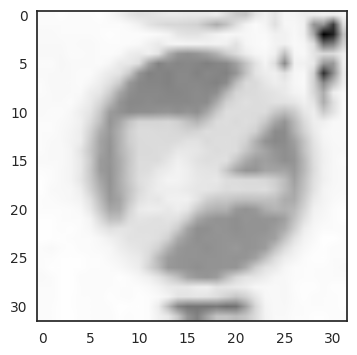

In [105]:
from PIL import Image
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']

new_training_file = "train_gray.p"
new_train = {}
new_train['features'] = np.asarray(gray_scale(X_train)) 
new_train['labels'] = y_train
pickle.dump( new_train, open( new_training_file, "wb" ) )

X_test, y_test = test['features'], test['labels']
from sklearn.cross_validation import train_test_split




In [60]:
## utils.py

"""
Converts the array of images into gray scale images

"""
def gray_scale(X):
    X_gray = []
    for each in X:
        #print(np.shape(each))
        gray_image = np.asarray(cv2.cvtColor(each, cv2.COLOR_RGB2GRAY))
        #print(type(gray_image))
        X_gray.append(np.expand_dims(gray_image,axis=2))
    plt.imshow(gray_image)
    #plt.imshow(X_gray[0])
    return X_gray

"""
Creates a validation and test set from the given data.
You can specify the gray scale.

Note: Samples are stratified samples.

"""
def create_validation_dataset(X,y,gray=False,prob = 0.3):
    X_validation, X_test, y_validation, y_test = train_test_split(X, y, train_size=prob,stratify=y,random_state=59)
    if gray:
        GRAY = "_gray"
    else:
        GRAY = ""
        
    new_training_file = "test_final"+GRAY+".p"
    new_train = {}
    if not gray:
        new_train['features'] = np.asarray(X_test)
    else:
        new_train['features'] = np.asarray(gray_scale(X_test) )
    new_train['labels'] = y_test
    pickle.dump( new_train, open( new_training_file, "wb" ) )
    
    new_training_file = "validation"+GRAY+".p"
    new_train = {}
    if not gray:
        new_train['features'] = np.asarray(X_validation)
    else:
        new_train['features'] = np.asarray(gray_scale(X_validation) )
    new_train['labels'] = y_validation
    pickle.dump( new_train, open( new_training_file, "wb" ) )
    
#    
#create_validation_dataset(X_test,y_test,gray=True)    


In [ ]:
plt.imshow(X_train[-1])

In [ ]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [ ]:
plt.imshow(Image.fromarray(X_train[0]).convert('LA'))
#plt.show()

In [ ]:
def convert_to_gray(x):
    return Image.fromarray(x).convert('L', (0.2989, 0.5870, 0.1140, 0))

In [ ]:
new_x_train = []
new_y_train = []
for x,y in zip(X_train,y_train):
    cv2.randn(img,m,s);
    for i in range(-5, 5, 5):
        img = convert_to_gray(x)
        
        new_image = np.asarray(img.rotate(i))
        new_x_train.append(np.expand_dims(new_image, axis=2))
        new_y_train.append(y)
#     plt.imshow(new_image)
#     plt.show()


In [ ]:
new_training_file = "train_new_gray.p"
new_train = {}
new_train['features'] = np.asarray(new_x_train)
new_train['labels'] = np.asarray(new_y_train)
pickle.dump( new_train, open( new_training_file, "wb" ) )

In [ ]:
np.shape(new_x_train[0])

In [ ]:
validation_file = "validation.p"
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)

In [ ]:
X_valid, y_valid = valid['features'], valid['labels']

In [ ]:
import random 
i = random.randint(0,len(X_valid))
plt.imshow(Image.fromarray(X_valid[i]).convert('L', (0.2989, 0.5870, 0.1140, 0)))
plt.show()
plt.imshow(Image.fromarray(X_valid[i]))
plt.show()
X_valid_new =[]
y_valid_new = []
for x,y in zip(X_valid,y_valid):
    X_valid_new.append(np.expand_dims(np.asarray(convert_to_gray(x)), axis=2))
    y_valid_new.append(y)
    


In [ ]:
new_training_file = "validation_gray.p"
new_train = {}
new_train['features'] = np.asarray(X_valid_new)
new_train['labels'] = np.asarray(y_valid_new)
pickle.dump( new_train, open( new_training_file, "wb" ) )

In [ ]:
X_valid_new =[]
y_valid_new = []
for x,y in zip(X_train,y_train):
    X_valid_new.append(np.expand_dims(np.asarray(convert_to_gray(x)), axis=2))
    y_valid_new.append(y)
new_training_file = "train_gray.p"
new_train = {}
new_train['features'] = np.asarray(X_valid_new)
new_train['labels'] = np.asarray(y_valid_new)
pickle.dump( new_train, open( new_training_file, "wb" ) )

In [ ]:
#!source activate CarND-TensorFlow-Lab;conda install -y seaborn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.axis([0, 10, 0, 1])
plt.ion()

for i in range(10):
    y = np.random.random()
    plt.scatter(i, y)
    plt.pause(0.05)

while True:
    plt.pause(0.05)

In [ ]:
training_file = "train.p"
with open(training_file, mode='rb') as f:
    train = pickle.load(f)

In [ ]:
X_train, y_train = train['features'], train['labels']


In [ ]:
np.std(X_train)

In [ ]:
type(X_train[0])

In [ ]:
import cv2
import numpy as np

img = X_train[200]
img_g = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img_g,cmap="gray")
plt.show()
# equalize the histogram of the input image
#plt.imshow(img)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img_hsv[:,:,2] = [[max(pixel - 50, 0) if pixel < 190 else min(pixel + 50, 255) for pixel in row] for row in img_hsv[:,:,2]]
img_hsv = cv2.cvtColor(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB),cv2.COLOR_RGB2GRAY)
plt.imshow(img_hsv,cmap="gray")
plt.show()

In [ ]:
cv2.cvtColor(X_train[0], cv2.COLOR_BGR2HSV)

In [ ]:
img = cv2.randn(X_train[0],m,100)

In [ ]:
img

In [9]:
import cv2
import numpy as np

im = np.empty((32,32,3), np.uint8) # needs preallocated input image
print(im)
# print(im)
# array([[248, 168,  58,   2,   1],  # uninitialized memory counts as random, too ?  fun ;) 
#        [  0, 100,   2,   0, 101],
#        [  0,   0, 106,   2,   0],
#        [131,   2,   0,  90,   3],
#        [  0, 100,   1,   0,  83]], dtype=uint8)
#im = np.zeros((5,5), np.uint8) # seriously now.
# >>> im
# array([[0, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0],
#        [0, 0, 0, 0, 0]], dtype=uint8)
print(cv2.randn(im,(0),(99)) )        # normal
# array([[  0,  76,   0, 129,   0],
#        [  0,   0,   0, 188,  27],
#        [  0, 152,   0,   0,   0],
#        [  0,   0, 134,  79,   0],
#        [  0, 181,  36, 128,   0]], dtype=uint8)
#print(cv2.randu(im,(0),(99)) )        # uniform
# array([[19, 53,  2, 86, 82],
#        [86, 73, 40, 64, 78],
#        [34, 20, 62, 80,  7],
#        [24, 92, 37, 60, 72],
#        [40, 12, 27, 33, 18]], dtype=uint8)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [105 110 112]
  [117 116  32]
  [105 109  97]]

 [[103 101  10]
  [112 114 105]
  [110 116  40]
  ..., 
  [117 110 116]
  [115  32  97]
  [115  32 114]]

 [[ 97 110 100]
  [111 109  44]
  [ 32 116 111]
  ..., 
  [ 32  32  32]
  [ 48  93  44]
  [ 10  35  32]]

 ..., 
 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [124   0   0]
  [226   0   0]
  [  0   0   0]]

 [[118   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [  0   0   0]
  [ 66   0   0]
  [213   0   0]]

 [[131   0   0]
  [  0   0   0]
  [  4   0   0]
  ..., 
  [117   0   0]
  [  0   0   0]
  [ 44   0   0]]

 ..., 
 [[  0   0   0]
  [ 34   0   0]


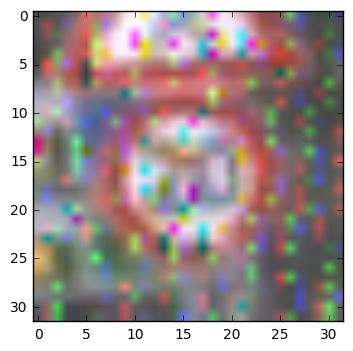

In [19]:
plt.imshow(X_train[0]+cv2.randu(im,(0),(0)))

In [21]:
print(cv2.randu(im,(0),(1)))

[[[  0   0   0]
  [  0 255 255]
  [  0 125 255]
  ..., 
  [  0 255 255]
  [  0 122   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0 255 255]
  [  0  50   0]
  ..., 
  [  0   0   0]
  [  0   0 255]
  [  0 255  70]]

 [[  0 255 255]
  [  0 255 255]
  [  0  34 255]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ..., 
 [[  0   0   0]
  [  0   0   0]
  [  0   0 255]
  ..., 
  [  0 255 255]
  [  0  45 255]
  [  0 255   2]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0 255]
  ..., 
  [  0 255 255]
  [  0  25 255]
  [  0 255  43]]

 [[  0 255 255]
  [  0 255 255]
  [  0  33 255]
  ..., 
  [  0   0   0]
  [  0   0 255]
  [  0 255   4]]]


In [34]:
row,col,ch= X_train[0].shape
mean = 0
var = 0.00001
sigma = var**0.5
gauss = np.random.uniform(mean,sigma,(row,col,ch))
gauss = gauss.reshape(row,col,ch)
noisy = X_train[0] + gauss

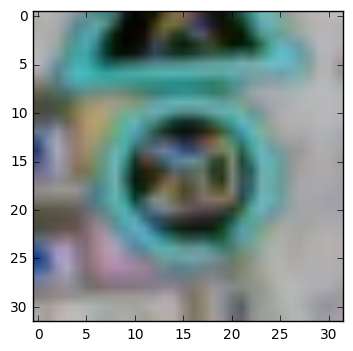

In [35]:
plt.imshow(noisy)

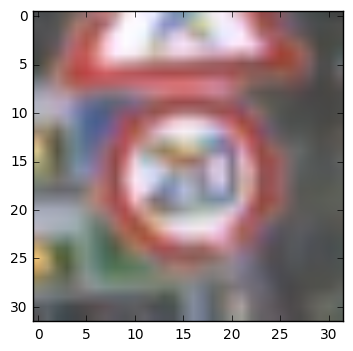

In [36]:
plt.imshow(X_train[0])

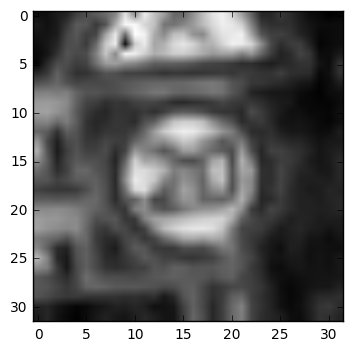

In [62]:
plt.imshow(cv2.cvtColor(np.asarray(np.random.uniform(-5,5,(row,col,ch)),dtype=np.uint8)+X_train[0], cv2.COLOR_RGB2GRAY),cmap="gray")

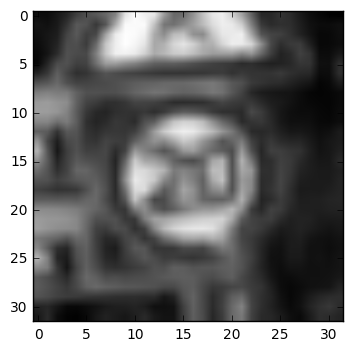

In [51]:
plt.imshow(cv2.cvtColor(X_train[0], cv2.COLOR_RGB2GRAY),cmap="gray")

In [134]:
def noisy_data(X,y):
    noisy_X = []
    noisy_y = []
    for ex,ey in zip(X,y):
        noisy_image = cv2.cvtColor(
                np.asarray(
                    np.random.uniform(
                        -5,5,(row,col,ch))
                    ,dtype=np.uint8)
                +ex
                , cv2.COLOR_RGB2GRAY)
        noisy_X.append(np.expand_dims(noisy_image,axis=2))
        noisy_y.append(ey)
    return noisy_X,noisy_y

def image_blur(X,y):
    blur_X =[]
    blur_y = []
    for ex,ey in zip(X,y):
        kernel = np.ones((5,5),np.float32)/25
        
        blr_img = cv2.filter2D(ex,-1,kernel)
        blur_X.append(blr_img)
        blur_y.append(ey)
    return blur_X,blur_y
    
def rotate_images(X_train,y_train):
    new_x_train = []
    new_y_train = []
    m = 0
    s = 0.1
    x_gray= gray_scale(X_train)
    for x,y in zip(x_gray,y_train):
        #cv2.randn(img,m,s)
        img = Image.fromarray(x)
        
        for i in range(-5, 5, 5):
            new_image = np.asarray(img.rotate(i))
            new_x_train.append(np.expand_dims(new_image, axis=2))
            new_y_train.append(y)
            
    return new_x_train,new_y_train
#     plt.imshow(new_image)
#     plt.show()

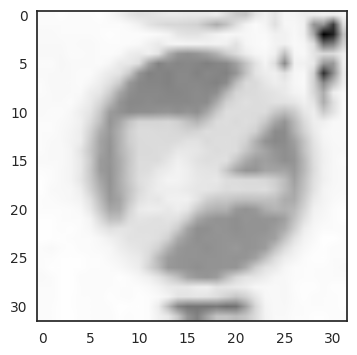

In [136]:
new_X, new_y = noisy_data(X_train,y_train)
#new_X.append()
nw_X = np.concatenate((new_X,gray_scale(X_train)), axis=0)
nw_y = np.concatenate((new_y,y_train),axis=0)
new_training_file = "train_gray_noisy.p"
new_train = {}
new_train['features'] =  np.asarray(nw_X)
new_train['labels'] = np.asarray(nw_y)
pickle.dump( new_train, open( new_training_file, "wb" ) )

In [108]:
np.shape(nw_y)

(78418,)

In [81]:
import seaborn as sns 
sns.set_style('white')

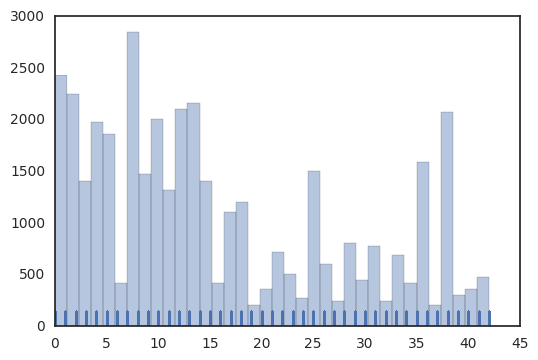

In [109]:
sns.distplot(y_train, kde=False, rug=True);

In [92]:
np.shape(y_train)

(39209,)

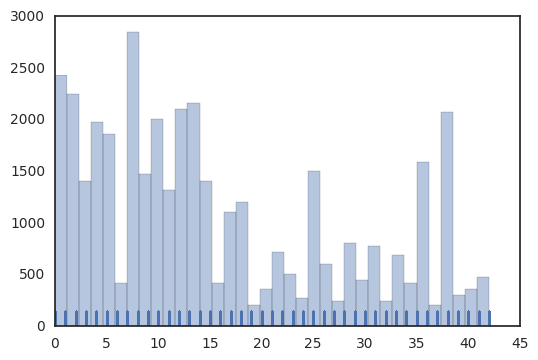

In [111]:
sns.distplot(new_y, kde=False, rug=True);

35053


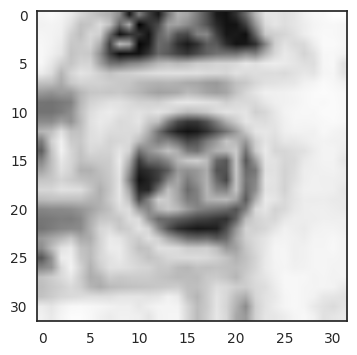

In [133]:
import random 
i = random.randint(0,len(new_y))
print(i)
plt.imshow(np.reshape(new_X[i],(32,32)))

In [7]:
from pathlib import Path
_file = Path("./resnet_v1.index")

In [8]:
_file.exists()

True